# Height vs Weight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('HvsW_Dataset.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [6]:
df['Gender'] = df['Gender'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  10000 non-null  category
 1   Height  10000 non-null  float64 
 2   Weight  10000 non-null  float64 
dtypes: category(1), float64(2)
memory usage: 166.2 KB


### Las unidades de altura ('Height') y peso ('Weight') estan dadas en pulgadas (inches) y libras (pounds) respectivamente, por esa razon, se crea dos nuevas columnas para cada variable pero con unidades de centímetros para altura y kilogramos para el peso.

$$1\left(Centímetro\right) = 2,54\left( Pulgadas\right)$$

$$1\left(Kilogramo\right) = 2.20462\left( Libras\right)$$

In [8]:
df['Height(cm)'] = df['Height']* 2.54
df['Height(cm)'] = np.round(df['Height(cm)'],1)
df['Height(cm)'].head()

0    187.6
1    174.7
2    188.2
3    182.2
4    177.5
Name: Height(cm), dtype: float64

In [9]:
df['Weight(Kg)'] = df['Weight']/ 2.20462
df['Weight(Kg)'] = np.round(df['Weight(Kg)'],1)
df['Weight(Kg)'].head()

0    109.7
1     73.6
2     96.5
3     99.8
4     93.6
Name: Weight(Kg), dtype: float64

In [10]:
df.head()

,Gender,Height,Weight,Height(cm),Weight(Kg)
0,Male,73.847017,241.893563,187.6,109.7
1,Male,68.781904,162.310473,174.7,73.6
2,Male,74.110105,212.740856,188.2,96.5
3,Male,71.730978,220.042470,182.2,99.8
4,Male,69.881796,206.349801,177.5,93.6


In [11]:
df.groupby('Gender').size()

Gender
Female    5000
Male      5000
dtype: int64

### Existen 5000 datos de altura y peso tanto para hombres como para mujeres, lo que indica que el dataset se encuentra balanceado para la variable categórica de genero ('Gender')

In [ ]:
import statsmodels.api as sm

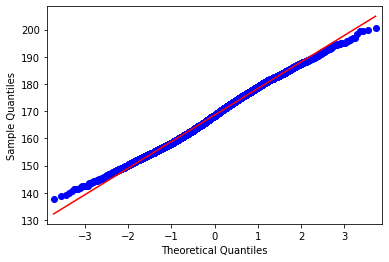

In [12]:
sm.qqplot (df['Height(cm)'], line=  'r')
plt.show()

<AxesSubplot:xlabel='Height(cm)', ylabel='Density'>

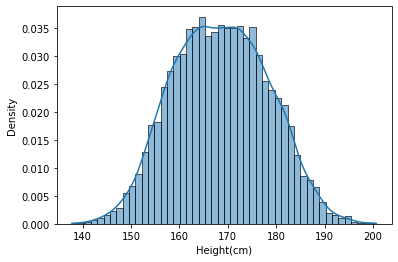

In [13]:
sns.histplot(df['Height(cm)'], stat= 'density', kde=True)

### La variable de altura presenta el comportamiento de una distribucion normal, como muestra la figura indica que el 50% por ciento de los datos son menores que la media y el otro 50% de los datos son mayores que la misma.

## ¿Tendrá el mismo comportamiento el peso?

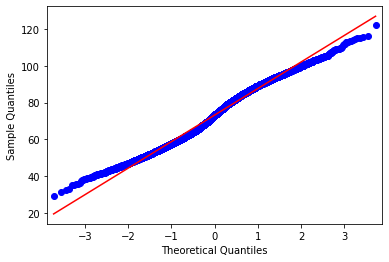

In [23]:
sm.qqplot (df['Weight(Kg)'], line=  'r')
plt.show()

<AxesSubplot:xlabel='Weight(Kg)', ylabel='Density'>

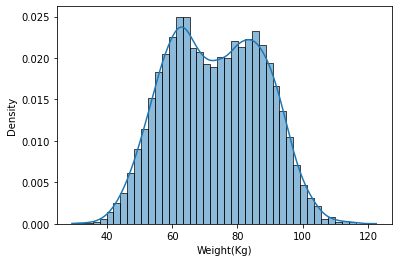

In [14]:
sns.histplot(df['Weight(Kg)'], stat= 'density', kde=True)

In [22]:
df[['Weight(Kg)']].describe()

,Weight(Kg)
count,10000.000000
mean,73.228450
std,14.563844
min,29.300000
25%,61.600000
50%,73.100000
75%,84.900000
max,122.500000


### Aunque la media y la mediana se acercan mucho y casi tienen el mismo valor, vemos que la figura no corresponde a una campana de distribución normal, esta se asemeja mas a una distribucion bimodal.

# ¿Como es la distribuciòn de los datos segun el genero?

In [27]:
df[df['Gender'] == 'Male']['Height(cm)'].describe()

count    5000.000000
mean      175.327120
std         7.273214
min       148.400000
25%       170.600000
50%       175.300000
75%       180.300000
max       200.700000
Name: Height(cm), dtype: float64

In [32]:
df[df['Gender'] == 'Female']['Height(cm)'].describe()

count    5000.000000
mean      161.820760
std         6.848886
min       137.800000
25%       157.200000
50%       161.900000
75%       166.500000
max       186.400000
Name: Height(cm), dtype: float64

<AxesSubplot:xlabel='Height(cm)', ylabel='Density'>

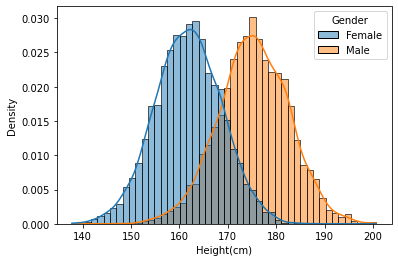

In [31]:
sns.histplot(data = df,x = 'Height(cm)', hue='Gender', stat= 'density', kde=True)

### La gràfica muestra dos distribuciones con comportamiento normal, cada una con diferente media. Es evidente que el promedio de altura es mayor en hombres que en mujeres.

# ¿Sucede lo mismo con el peso? ¿El promedio de peso en los hombres es mayor que las mujeres?

<AxesSubplot:xlabel='Weight(Kg)', ylabel='Density'>

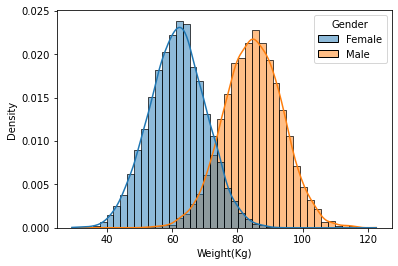

In [35]:
sns.histplot(data = df,x = 'Weight(Kg)', hue='Gender', stat= 'density', kde=True)

### La grafica tambien muestra dos distribuciones con diferente media. Es evidente que los hombres tienen un promedio de peso mas alto que las mujeres.

# ¿Què relaciòn existe entre el peso y la altura?

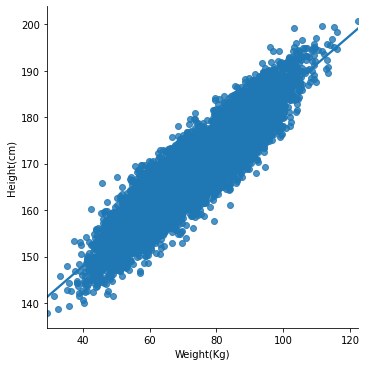

In [54]:
sns.lmplot(x='Weight(Kg)', y = 'Height(cm)', data= df)

### Efectivamente, la grafica evidencia una relacion directamente proporcional entre el peso y la altura de una persona independientemente de su genero. Para reforzar y encontrar un valor exacto de esa relacion efectuamos la correlacion de Pearson.

In [77]:
df.corr('spearman').loc['Weight(Kg)']['Height(cm)']

0.9256851768797733

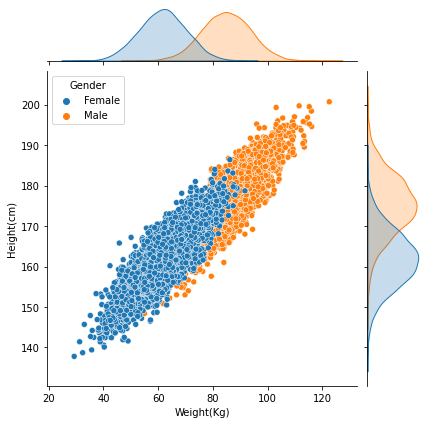

In [72]:
sns.jointplot(x='Weight(Kg)', y= 'Height(cm)', hue='Gender', data=df)

In [75]:
df[df['Gender']== 'Male'].corr('spearman').loc['Weight(Kg)']['Height(cm)']

0.8485419157755683

In [76]:
df[df['Gender']== 'Female'].corr('spearman').loc['Weight(Kg)']['Height(cm)']

0.8364022273273842

### De igual forma se evidencia una fuerte relacion positiva entre el peso y la altura para cada genero. Aunque para el hombre su relacion es un poco mas fuerte que la relacion entre peso y altura de las mujeres. 
### No se presenta la paradoja de Simpson, la relaciòn sigue siendo positiva tanto para la altura y peso en general como si se observara por genero.